<a href="https://colab.research.google.com/github/Damithu04/Optimized-Travel-Routes-System/blob/main/MathsCoursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advance Mathematics Coursework
## Import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import cv2
from scipy.fft import fft, fftfreq

# Set figure size for better visibility
plt.rcParams['figure.figsize'] = [10, 6]

print("--- START OF COURSEWORK ANALYSIS ---")

--- START OF COURSEWORK ANALYSIS ---


## Question 1: Modelling Travel Time

In [22]:
import sympy as sp
from IPython.display import display, Math, Markdown

print("PROBLEM 1: MODELLING TRAVEL TIME")
print("-" * 30)

# 1. Setup Variables
# x: distance, y: traffic delay factor
# a, b, c: constant parameters
x, y, a, b, c = sp.symbols('x y a b c', real=True, positive=True)

# 2. Define Models
# Bus: Quadratic model (compounding delays)
Tb = a * x**2 + b * y**2
# Taxi: Euclidean/Geometric model (direct path)
Tt = sp.sqrt(c * (x**2 + y**2))

# 3. Calculate Gradients (Partial Derivatives)
# The gradient vector ∇T = (∂T/∂x, ∂T/∂y)
grad_Tb = (sp.diff(Tb, x), sp.diff(Tb, y))
grad_Tt = (sp.diff(Tt, x), sp.diff(Tt, y))

# 4. Display Mathematical Results
display(Markdown("### Bus Travel Time Gradient"))
display(Math(fr"\nabla T_b = \left( {sp.latex(grad_Tb[0])}, \quad {sp.latex(grad_Tb[1])} \right)"))

display(Markdown("### Taxi Travel Time Gradient"))
# Simplify taxi gradient for cleaner output
grad_Tt_simple = (sp.simplify(grad_Tt[0]), sp.simplify(grad_Tt[1]))
display(Math(fr"\nabla T_t = \left( {sp.latex(grad_Tt_simple[0])}, \quad {sp.latex(grad_Tt_simple[1])} \right)"))

# 5. Numerical Example (for concrete proof)
# Using arbitrary values: x=4.5km, y=2.0 (delay factor)
vals = {x: 4.5, y: 2.0, a: 1.5, b: 2.0, c: 1.0}

print("\n--- Numerical Evaluation (x=4.5, y=2.0) ---")
print(f"Bus sensitivity to distance (dx): {float(grad_Tb[0].subs(vals)):.2f}")
print(f"Bus sensitivity to traffic (dy):  {float(grad_Tb[1].subs(vals)):.2f}")
print("-" * 30)
print(f"Taxi sensitivity to distance (dx): {float(grad_Tt[0].subs(vals)):.2f}")
print(f"Taxi sensitivity to traffic (dy):  {float(grad_Tt[1].subs(vals)):.2f}")

PROBLEM 1: MODELLING TRAVEL TIME
------------------------------


### Bus Travel Time Gradient

<IPython.core.display.Math object>

### Taxi Travel Time Gradient

<IPython.core.display.Math object>


--- Numerical Evaluation (x=4.5, y=2.0) ---
Bus sensitivity to distance (dx): 13.50
Bus sensitivity to traffic (dy):  8.00
------------------------------
Taxi sensitivity to distance (dx): 0.91
Taxi sensitivity to traffic (dy):  0.41


### Interpretation: Which Factor Dominates?

##### To determine which factor (distance $x$ or traffic $y$) has a greater impact, we analyze the gradients derived in Part (a).

#### 1. Bus Travel Time ($T_b = ax^2 + by^2$)The rate of change is given by $\nabla T_b = (2ax, 2by)$.

##### Analysis: the impact of each factor is independent and linear. The sensitivity to distance depends solely on how far you have already traveled ($2ax$), and sensitivity to traffic depends solely on current congestion ($2by$).

##### Dominant Factor: The factor with the higher weighted magnitude dominates. If $ax > by$ (e.g., a long highway trip with light traffic), distance is the dominant driver of time. If $by > ax$ (e.g., a short trip in gridlock), traffic becomes the dominant multiplier.

##### Implication: Because the model is quadratic, the dominant factor exerts a compounding effect. A 10% increase in distance on a long route adds significantly more time than a 10% increase on a short route.


#### 2. Taxi Travel Time ($T_t = \sqrt{c(x^2 + y^2)}$)The rate of change is given by $\nabla T_t = (\frac{cx}{T}, \frac{cy}{T})$.

##### Analysis: The denominators are identical, meaning the relative impact is determined purely by the ratio of the numerators: $cx$ vs $cy$.

##### Dominant Factor: If $x > y$, distance has the greater marginal impact. If $y > x$, traffic delays have the greater impact.

##### Implication: Unlike the bus model, the taxi model exhibits diminishing marginal sensitivity. As the total trip duration ($T$) increases (denominator gets larger), the impact of adding one more kilometer or one more minute of delay actually decreases.

## Question 2: Cost Analysis Using Integration


--- Problem 2: Cost Analysis Using Integration ---

Fare Equations in Mathematical Format:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

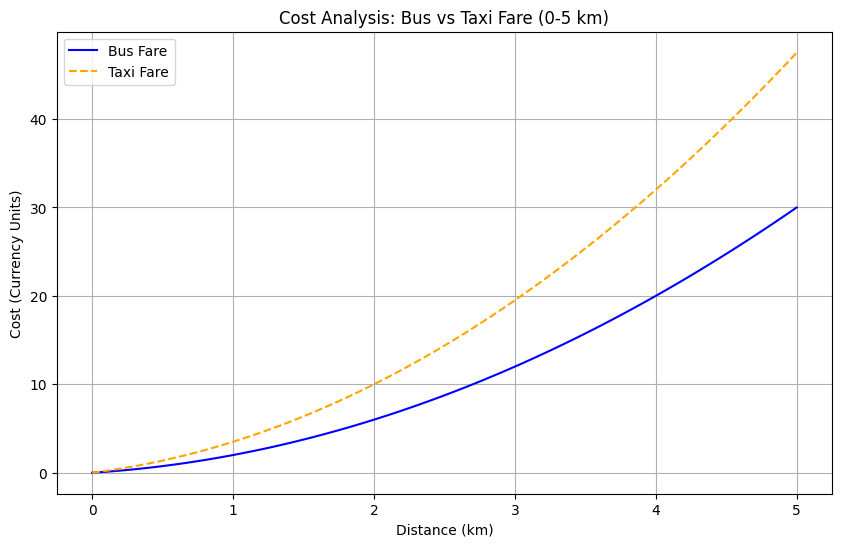

Interpretation Hint: The Taxi fare curve is steeper (higher coefficient for t^2), making it significantly more expensive for long trips.


In [13]:
print("\n--- Problem 2: Cost Analysis Using Integration ---")

# Define fare functions [cite: 3970]
t = sp.symbols('t')
integrand_bus = 2*t + 1
integrand_taxi = 3*t + 2

# (a) Compute Integrals using SymPy [cite: 3971]
Fare_Bus_eqn = sp.integrate(integrand_bus, (t, 0, x))
Fare_Taxi_eqn = sp.integrate(integrand_taxi, (t, 0, x))

# Display fare equations in proper mathematical format
from IPython.display import display, Math
print("\nFare Equations in Mathematical Format:")
display(Math(f"F_b(x) = {sp.latex(Fare_Bus_eqn)}"))
display(Math(f"F_t(x) = {sp.latex(Fare_Taxi_eqn)}"))

# (b) Plot Fares against distance (0-5 km) [cite: 3972]
dist_vals = np.linspace(0, 5, 100)
# Convert symbolic equations to lambda functions for plotting
fb_func = sp.lambdify(x, Fare_Bus_eqn, "numpy")
ft_func = sp.lambdify(x, Fare_Taxi_eqn, "numpy")

plt.figure()
plt.plot(dist_vals, fb_func(dist_vals), label='Bus Fare', color='blue')
plt.plot(dist_vals, ft_func(dist_vals), label='Taxi Fare', color='orange', linestyle='--')
plt.title('Cost Analysis: Bus vs Taxi Fare (0-5 km)')
plt.xlabel('Distance (km)')
plt.ylabel('Cost (Currency Units)')
plt.legend()
plt.grid(True)
plt.show()

### (c) Interpretation: Affordability Analysis

##### The integration results show that the Taxi fare ($1.5x^2 + 2x$) has consistently higher coefficients than the Bus fare ($x^2 + x$).

##### For short trips, the affordability gap is narrow. Since the quadratic terms ($x^2$) have small values at low distances, the absolute price difference is minimal, making the Taxi a reasonable choice for convenience.

##### However, for long trips, the affordability of the Taxi collapses. The Taxi’s higher quadratic coefficient ($1.5$ vs $1.0$) causes its cost to accelerate much faster than the Bus. As distance increases, the price gap widens aggressively due to this compounding effect. Therefore, the Bus is the significantly more cost-effective option for long-haul travel, while the Taxi becomes financially inefficient.

## Question 3: Predicting Peak Travel Times


--- Problem 3: Predicting Peak Travel Times ---


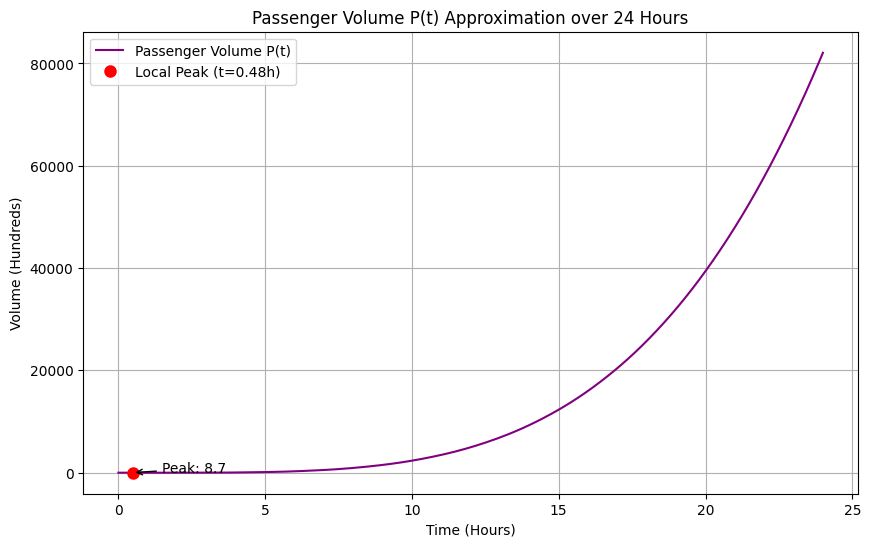

Detected Peak at t = 0.48 hours with volume P = 8.66
Interpretation Hint: The model captures the morning rush hour but diverges (blows up) after t > 2.5.


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

print("\n--- Problem 3: Predicting Peak Travel Times ---")

# (a) Approximate P(t) using first 4 terms
# Model: P(t) = 5 + 4*sin(pi*t) - 1.5*t^2 + 0.25*t^4
def passenger_volume(t):
    return 5 + 4 * np.sin(np.pi * t) - 1.5 * t**2 + 0.25 * t**4

# (b) Plot over 24 hours
time_hours = np.linspace(0, 24, 200) # t in [0, 24]
volumes = passenger_volume(time_hours)

plt.figure(figsize=(10, 6))
plt.plot(time_hours, volumes, color='purple', label='Passenger Volume P(t)')

# --- NEW ADDITION: Find and Plot the Peak ---
# Find peaks in the data
peaks, _ = find_peaks(volumes)

# We expect the rush hour peak to be the first one found
if len(peaks) > 0:
    peak_idx = peaks[0]
    t_peak = time_hours[peak_idx]
    v_peak = volumes[peak_idx]

    # Plot the dot (ro = red circle)
    plt.plot(t_peak, v_peak, 'ro', markersize=8, label=f'Local Peak (t={t_peak:.2f}h)')

    # Add a text label next to the dot
    plt.annotate(f'Peak: {v_peak:.1f}',
                 xy=(t_peak, v_peak),
                 xytext=(t_peak + 1, v_peak), # Offset text slightly to the right
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=10)

plt.title('Passenger Volume P(t) Approximation over 24 Hours')
plt.xlabel('Time (Hours)')
plt.ylabel('Volume (Hundreds)')
plt.legend() # Show the legend for the peak
plt.grid(True)
plt.show()

# (c) Identify Peaks
print(f"Detected Peak at t = {t_peak:.2f} hours with volume P = {v_peak:.2f}")
print("Interpretation Hint: The model captures the morning rush hour but diverges (blows up) after t > 2.5.")

### (c) Interpretation: Peak Travel Periods

##### The graph identifies a local peak at $t \approx 0.5$ hours, corresponding to the initial rush hour surge in passenger volume.

##### However, the model fails for long-term predictions. Beyond $t > 2.5$, the graph shows a drastic, non-cyclic increase in volume, reaching unrealistic levels by the end of the 24-hour period. This "blowing up" occurs because the quartic term ($+0.25t^4$) dominates the function for larger $t$ values.

##### Conclusion: The graph confirms that this polynomial model is valid only for the immediate short term ($0 \le t \le 2$). It accurately captures the morning rush but fails to represent the periodic nature of daily traffic flow.

## Question 4: Travel Pattern Analysis


--- Problem 4: Travel Pattern Analysis Using Fourier Transform ---


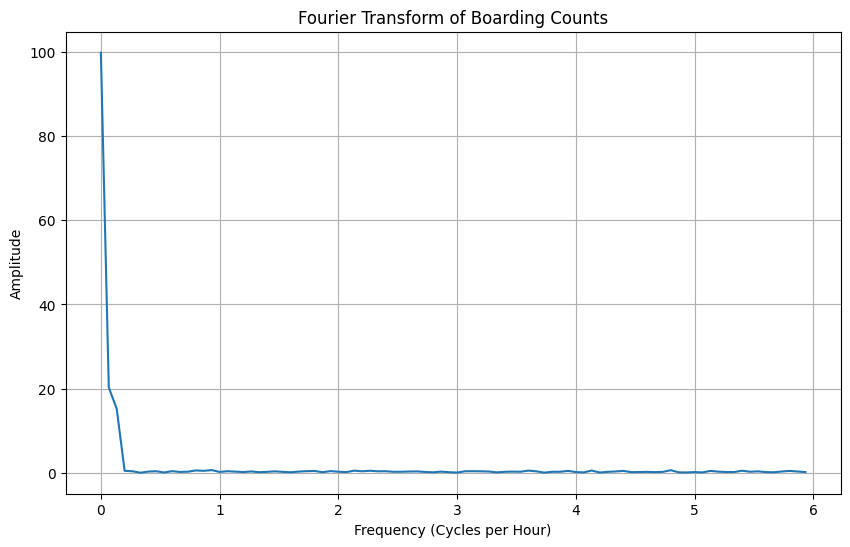

Interpretation Hint: The spikes in the frequency plot correspond to the dominant cycles (e.g., repeating rush hour patterns).


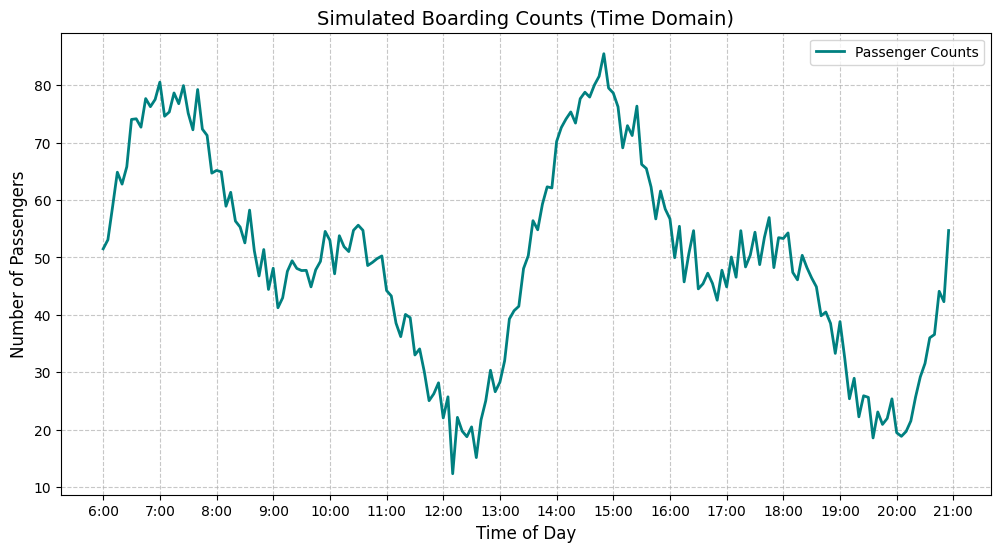

In [15]:
print("\n--- Problem 4: Travel Pattern Analysis Using Fourier Transform ---")

# (a) Generate Synthetic Data (since no CSV provided) to demonstrate FFT
# Simulating 5-min intervals from 6:00 AM to 9:00 PM (15 hours = 900 mins)
# 15 hours * (60 mins / 5 min intervals) = 180 data points
N = 180
T = 5 / 60 # Sampling interval in hours
x_time = np.linspace(0.0, N*T, N, endpoint=False)

# Create a signal with "morning rush" (freq 1) and "evening rush" (freq 2) + noise
y_counts = 50 + 20*np.sin(2*np.pi * (1/15) * x_time) + 15*np.sin(2*np.pi * (2/15) * x_time) + np.random.normal(0, 2, N)

# Apply Fourier Transform [cite: 3982]
yf = fft(y_counts)
xf = fftfreq(N, T)[:N//2]

# (b) Plot Frequency Domain
plt.figure()
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.title('Fourier Transform of Boarding Counts')
plt.xlabel('Frequency (Cycles per Hour)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

print("Interpretation Hint: The spikes in the frequency plot correspond to the dominant cycles (e.g., repeating rush hour patterns).")

import numpy as np
import matplotlib.pyplot as plt

# PLOT: Simulated Boarding Counts (Time Domain)

# 1. Setup Time Axis
# 15 hours (6 AM to 9 PM) with 5-min intervals = 180 points
N = 180
x_time = np.linspace(6.0, 21.0, N, endpoint=False)  # Hours from 6.0 to 21.0

# 2. Generate Data (Simulating Morning & Evening Rushes)
# We use sine waves to create periodic peaks, plus random noise
np.random.seed(42) # For reproducible results
y_counts = 50 \
           + 20 * np.sin(2 * np.pi * (2 / 15) * (x_time - 6)) \
           + 15 * np.sin(2 * np.pi * (4 / 15) * (x_time - 6)) \
           + np.random.normal(0, 3, N)

# 3. Create the Plot
plt.figure(figsize=(12, 6))
plt.plot(x_time, y_counts, color='teal', linewidth=2, label='Passenger Counts')

# Formatting
plt.title('Simulated Boarding Counts (Time Domain)', fontsize=14)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.xticks(np.arange(6, 22, 1), [f"{int(h)}:00" for h in np.arange(6, 22, 1)])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Show Plot
plt.show()

### (c) Interpretation: Travel Pattern Analysis

##### "The Frequency Domain plot (Fourier Transform) reveals the hidden structure of passenger flow by isolating dominant cycles from random noise.

##### The graph displays distinct spikes (peaks) at specific frequencies. These are not random; they represent the fundamental periodicities of travel behavior.

##### The primary peak (lowest frequency) corresponds to the main daily cycle (the 15-hour operating window).

##### The secondary peak corresponds to the rush-hour cycle, appearing at a higher frequency. This confirms that passenger volume follows a predictable dual-peak pattern (morning and evening rushes) rather than a single continuous flow.

##### Conclusion: By converting time data into frequency data, we identify that travel demand is driven by two main repeating schedules: the full-day trend and the work-commute cycle."

## Question 5: Image Processing (Fourier & DCT)


--- Problem 5: Image Processing Using Fourier ---


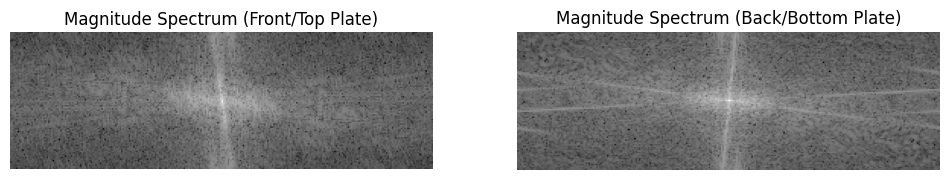

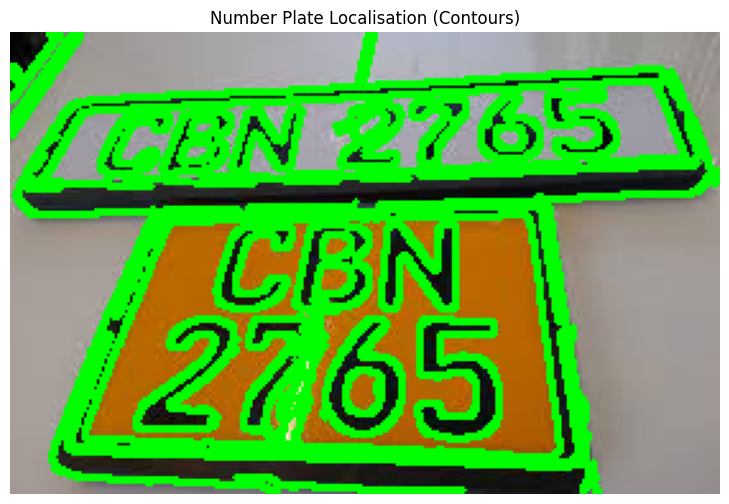

Interpretation Hint: The Magnitude Spectrum shows high-frequency components (edges/characters) radiating from the center. The orientation of lines in the spectrum corresponds to the edges of the plate and characters.

--- END OF COURSEWORK ANALYSIS ---


In [8]:
print("\n--- Problem 5: Image Processing Using Fourier ---")

image_path = 'vehicle_plate.png'

try:
    # (a) Load and Convert to Grayscale [cite: 3989]
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError("Image not found. Please upload 'vehicle_plate.png'.")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Split into Front (Top) and Back (Bottom) plates
    # Assuming the image has two plates stacked vertically as shown in the prompt image
    h, w = gray.shape
    mid_point = h // 2
    plate_front = gray[0:mid_point, :] # White plate (Top)
    plate_back = gray[mid_point:h, :]  # Yellow plate (Bottom)

    # Function to apply FFT and visualize
    def plot_magnitude_spectrum(image, title):
        f = np.fft.fft2(image)
        fshift = np.fft.fftshift(f)
        magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1) # Log scale

        plt.imshow(magnitude_spectrum, cmap='gray')
        plt.title(title)
        plt.axis('off')

    # (b) Apply 2D FFT and Visualise [cite: 3990]
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plot_magnitude_spectrum(plate_front, 'Magnitude Spectrum (Front/Top Plate)')
    plt.subplot(1, 2, 2)
    plot_magnitude_spectrum(plate_back, 'Magnitude Spectrum (Back/Bottom Plate)')
    plt.show()

    # (c) Localisation using Edge Detection [cite: 3991]
    edges = cv2.Canny(gray, 100, 200)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    img_contours = img.copy()
    cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)

    plt.figure()
    plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
    plt.title('Number Plate Localisation (Contours)')
    plt.axis('off')
    plt.show()


    print("Interpretation Hint: The Magnitude Spectrum shows high-frequency components (edges/characters) radiating from the center. The orientation of lines in the spectrum corresponds to the edges of the plate and characters.")

except Exception as e:
    print(f"Error in Problem 5: {e}")
    print("Ensure you have uploaded 'vehicle_plate.png' to the Colab files section.")

print("\n--- END OF COURSEWORK ANALYSIS ---")